## Titanic sklearn tree

base line

In [212]:
#установка библиотек
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import os

from IPython.display import HTML
style = '<style>svg{width:200px !important:height:400px !important;}</style>'
HTML(style)


In [213]:
# формируем путь директории файлов
c_dir = os.path.join(os.path.dirname(os.getcwd()), 'FIRST/src')

In [214]:
titanic_data = pd.read_csv(os.path.join(c_dir, 'train.csv'))

In [215]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# предобренька данных

In [216]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [217]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', ], axis=1)
y = titanic_data.Survived

In [218]:
# one hot encoding
X = pd.get_dummies(X)

In [219]:
# исключение null из массива
X = X.fillna({'Age': X.Age.median()})

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [222]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [223]:
clf.score(X_train, y_train)

0.8238255033557047

In [224]:
clf.score(X_test, y_test)

0.8203389830508474

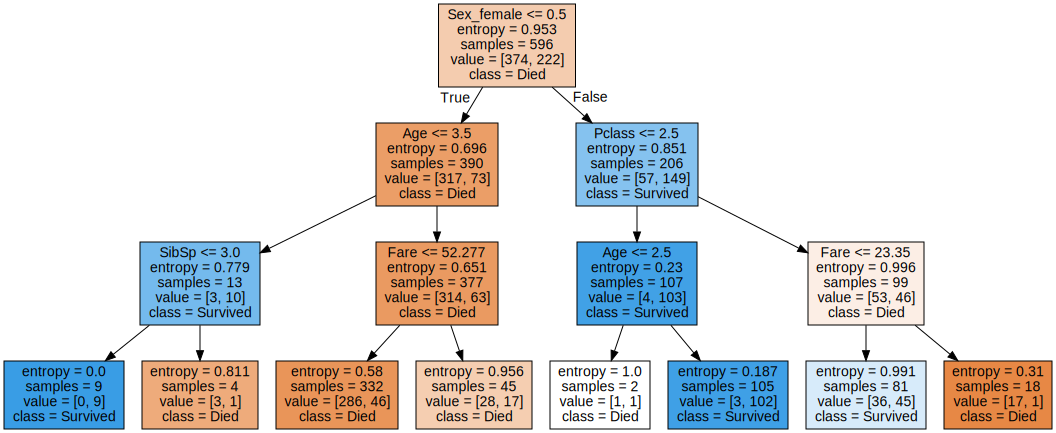

In [225]:
graph = Source(tree.export_graphviz(
    clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'],
    filled=True))
display(SVG(graph.pipe(format='svg')))

In [226]:
from sklearn.model_selection import cross_val_score

In [227]:
max_depth_values = range(1, 100)

temp_score_date= []
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_date.append((max_depth, train_score, test_score, mean_cross_val_score))

scores_date = pd.DataFrame(temp_score_date, columns=['max_depth', 'train_score','test_score', 'cross_val_score'])

In [228]:
scores_date_long = pd.melt(
    scores_date, id_vars=['max_depth'],
    value_vars=['train_score', 'test_score', 'cross_val_score'],
    var_name='set_type',
    value_name='score'
    )

In [229]:
scores_date_long.query(
    f'''set_type == 'cross_val_score' and score == {
        scores_date_long.query("set_type == 'cross_val_score'").score.max()
    }''')

,max_depth,set_type,score
203,6,cross_val_score,0.807115


<Axes: xlabel='max_depth', ylabel='score'>

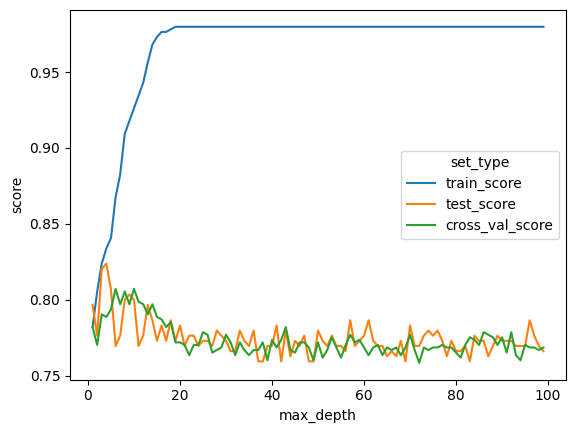

In [230]:
sns.lineplot(
    data=scores_date_long,
    x="max_depth",y="score", hue="set_type"
    )

In [231]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [232]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [233]:
best_clf.score(X_train, y_train), best_clf.score(X_test, y_test)

(0.9345637583892618, 0.7694915254237288)

# задача на датасете ириса

In [234]:
iris_train = pd.read_csv(os.path.join(c_dir, 'train_iris.csv'))
test_train = pd.read_csv(os.path.join(c_dir, 'test_iris.csv'))

In [235]:
iris_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [236]:
test_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [237]:
X_test = test_train.drop(['Unnamed: 0', 'species'], axis=1)
y_test = test_train[['species']]
X_train = iris_train.drop(['Unnamed: 0', 'species'], axis=1)
y_train = iris_train[['species']]

In [238]:

temp_score_date= []
max_depth_values = range(1, 100)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_date.append((max_depth, train_score, test_score, ))

scores_date = pd.DataFrame(temp_score_date, columns=['max_depth', 'train_score','test_score', ])

In [239]:
scores_date_long = pd.melt(
    scores_date, id_vars=['max_depth'],
    value_vars=['train_score', 'test_score', ],
    var_name='set_type',
    value_name='score'
    )

<Axes: xlabel='max_depth', ylabel='score'>

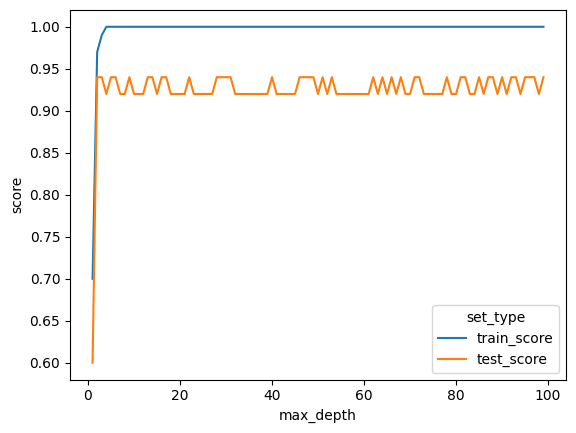

In [240]:
sns.lineplot(
    data=scores_date_long,
    x="max_depth",y="score", hue="set_type"
    )

In [241]:
dogs_n_cats = pd.read_csv(os.path.join(c_dir, 'dogs_n_cats.csv'))

In [242]:
X = dogs_n_cats.drop(['Вид'], axis=1)
y = dogs_n_cats[['Вид']]


In [243]:
# y['Вид'] = y['Вид'].apply(lambda x: 0 if x == 'собачка' else 1)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [245]:
temp_score_date= []
max_depth_values = range(1, 100)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_date.append((max_depth, train_score, test_score, ))

scores_date = pd.DataFrame(temp_score_date, columns=['max_depth', 'train_score','test_score', ])

In [246]:
scores_date_long = pd.melt(
    scores_date, id_vars=['max_depth'],
    value_vars=['train_score', 'test_score', ],
    var_name='set_type',
    value_name='score'
    )

<Axes: xlabel='max_depth', ylabel='score'>

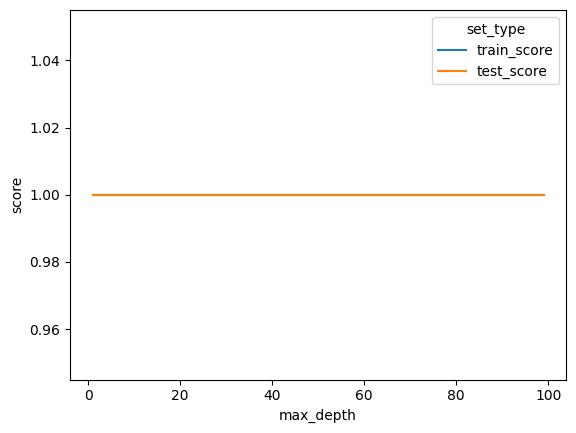

In [247]:
sns.lineplot(
    data=scores_date_long,
    x="max_depth",y="score", hue="set_type"
    )

In [248]:
train = pd.read_json(os.path.join(c_dir, 'dataset_209691_15.txt'))

In [249]:
result = clf.predict(train)

In [250]:
# Если вы совсем душнила, то так:
pd.Series(result).value_counts()

собачка    59
котик      41
Name: count, dtype: int64